# Laboratorio 2 

## Integrantes

Nicolas Diaz Montaña - n.diaz9 - 202021006
<br>
Julio Peña - 
<br>
Sebastian Casanova -

## Objetivos

- Construir modelos analíticos para estimar una variable objetivo continua a partir de un conjunto de variables observadas.


- Comprender el proceso para la construcción de modelos analíticos que responden a una tarea de regresión.


- Automatizar el proceso de construcción de modelos analíticos con el uso de pipelines de tal forma que puedan ser usados en ambientes de producción.


- Extraer información útil para el negocio a partir de los resultados de los modelos de regresión.

## Contexto del Negocio

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de <u>**crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un altonúmero de muertes por cáncer aunque no haya registros completos u oficiales.**</u>
<br><br>
Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

In [4]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [5]:
cancer_df = pd.read_csv("./data/202410_Laboratorio 2 - Regresión_train_data.csv")

 ## 1. Entendimiento de Datos

 ### 1.1. Entendimientos Basicos

Usando el metodo `shape` se logran evidenciar que dentro del CONJUNTO DE DATOS se encuentran 2132 FILAS (REGISTROS) y 34 COLUMNAS (VARIABLES).

In [6]:
cancer_df.shape

(2132, 34)

Por medio de la funcion `describe()` se realizo un analisis estadistico descriptivo, visualizandolo en una tabla. De momento no se visualiza incongruencias 

In [7]:
cancer_df.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,528.000000,2132.000000,2132.000000,2132.000000,2017.000000,2132.000000,2132.000000,1704.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,2.479013,51.756285,18.134897,34.981660,41.151705,6.201173,34.949578,13.225797,54.119137,7.843574,64.393011,48.407688,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,0.421538,6.925242,8.091987,9.024105,11.046405,4.628540,7.056699,5.395211,8.398898,3.448596,10.670887,9.985504,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.700000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,2.360000,47.775000,12.700000,29.200000,34.000000,3.100000,30.600000,9.300000,48.600000,5.500000,57.175000,41.275000,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,2.500000,52.300000,17.100000,34.700000,40.600000,5.400000,35.400000,12.300000,54.400000,7.600000,65.300000,48.800000,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,2.630000,56.500000,22.425000,40.700000,46.725000,8.300000,39.800000,16.100000,60.300000,9.700000,72.100000,55.500000,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,3.970000,72.500000,64.100000,65.700000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.200000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


Ahora se revisan las caracteristicas de los datos: **completitud y tipo de dato** por medio de la funcion `info`. Con esto se evicencia, que las columnas `PctSomeCol18_24`, `PctEmployed16_Over` y `PctPrivateCoverageAlone` tienen **nulos**. Por otro lado, parece que los tipos son congruentes con el tipo de variable que les corresponden siendo la mayoria float64 o int64. Siendo la exepcion la columna `Geography` que es de tipo object al tener que necesitar palabras para describir el condado y en que estado se encuentra ese condado.

In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24            

Al explorara las variables no numericas, que este caso solamente seria la variable `Geography` como se denoto anteriormente, podemos ver que solo existen 10 condados diferentes dentro del Dataframe.

In [9]:
nom_cols_no_num = cancer_df.select_dtypes(include = ['object']).columns

cancer_df[nom_cols_no_num].describe()

,binnedInc,Geography
count,2132,2132
unique,10,2132
top,"(37413.8, 40362.7]","Gregory County, South Dakota"
freq,223,1


### 1.2.  Preseleccion de Variables

En principio nuestra **variable objetivo** es la columna `deathRate` y todas las 33 columnas restantes son nuestras posibles **variables de entrada**. Ahora toca realizar una busqueda de relaciones de las variables con la variable objetivo y entre las mismas para poder generar hipotesis.
<br><br>
En un principo vamos a guardar las variables de entrada para facilitar la busqueda.

In [10]:
features = list(col for col in cancer_df.columns if col != 'deathRate')
print(features)

sub1_feature = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent']
sub2_feature = ['studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography']
sub3_feature = ['AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24']
sub4_feature = ['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone']
sub5_feature = ['PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian']
sub6_feature = ['PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


### 1.2.1.  Búsqueda de relaciones con la variable objetivo

Si se logra visualizar o cuantificar altas correlaciones entre las variables de entrada y la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.
<br><br>
En este sub grupo (1) de `features` parece que las variables que mas tiene correlacion con la variable objetivo son `incidenceRate`, `medIncome`y `povertyPercent`.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


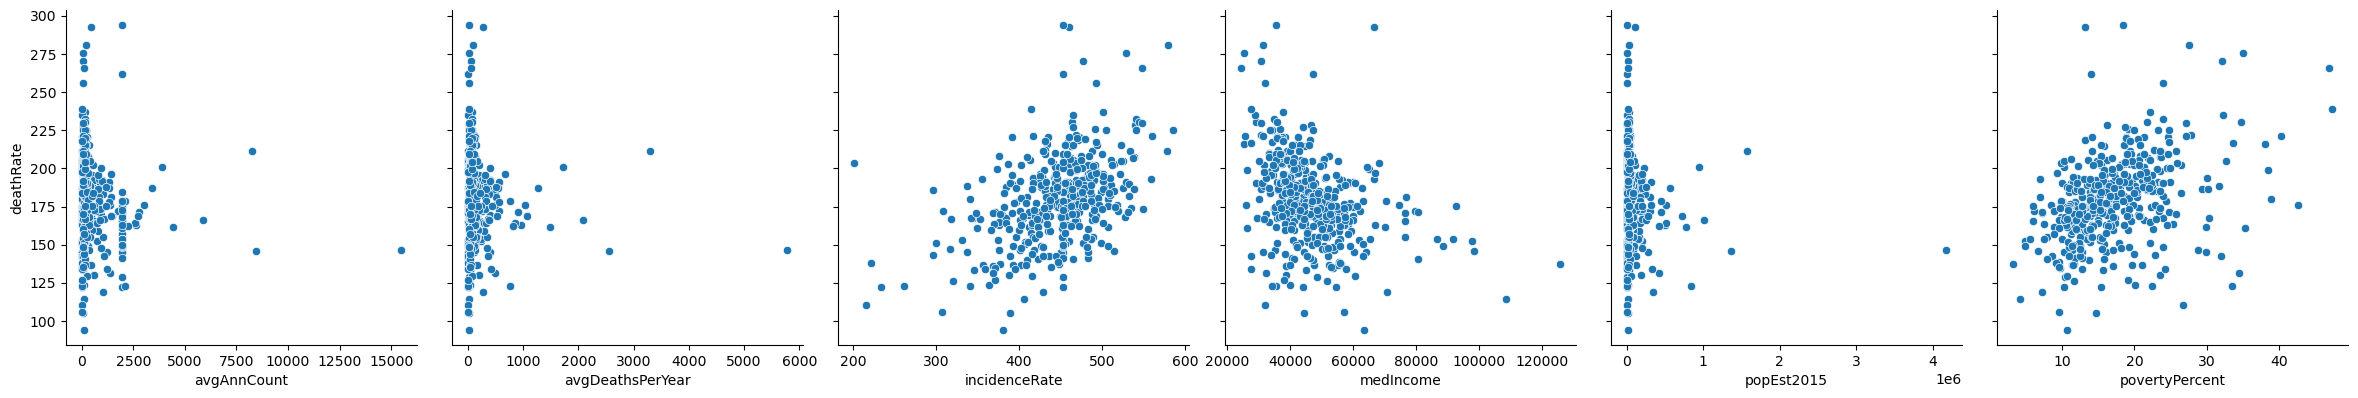

In [11]:
# Sub-Grupo 1
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub1_feature, kind="scatter")

En este sub grupo (2) de `features` parece que no hay variables que se relacionen con la variable objetivo.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


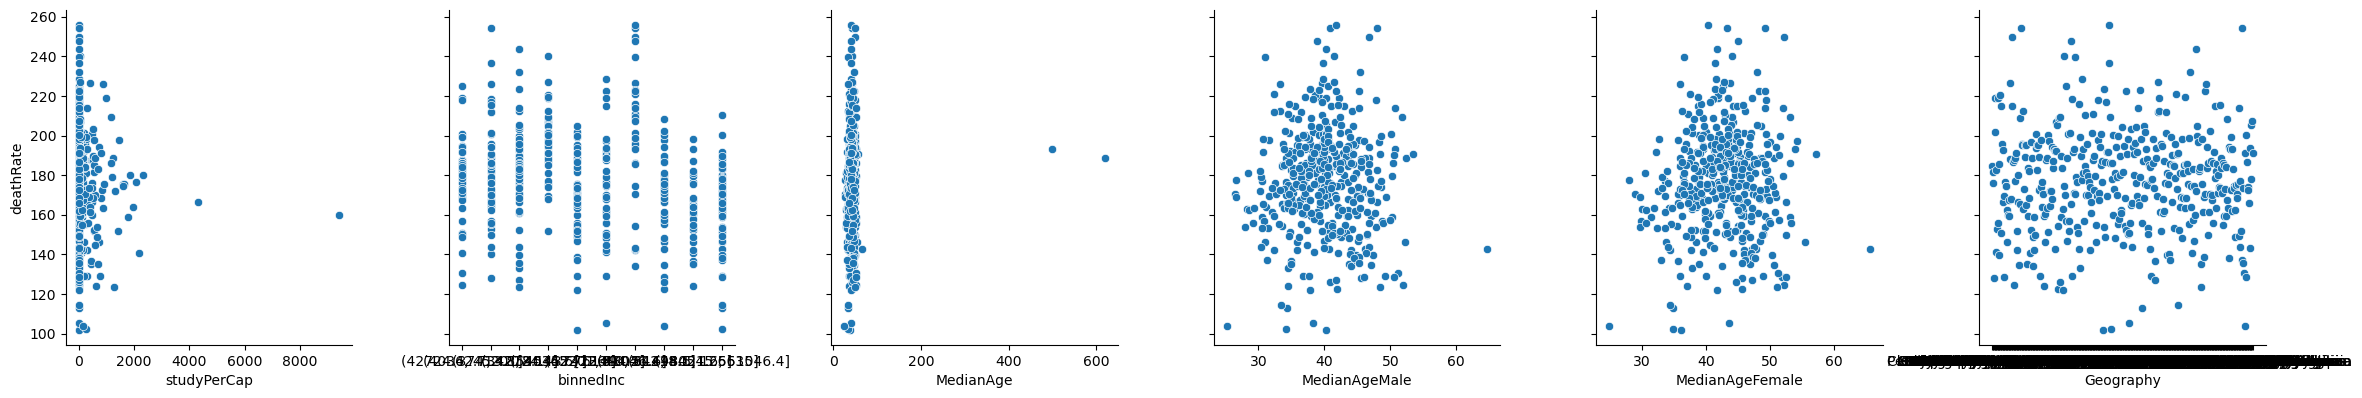

In [12]:
# Sub-Grupo 2
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub2_feature, kind="scatter")

En este sub grupo (3) de `features` parece que no hay variables que se relacionen con la variable objetivo. A su vez por la falta del ~75% de los datos de la columna `PctSomeCol18_24`, no se puede ver con exactitud la relacion que tiene con la variable objetivo.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


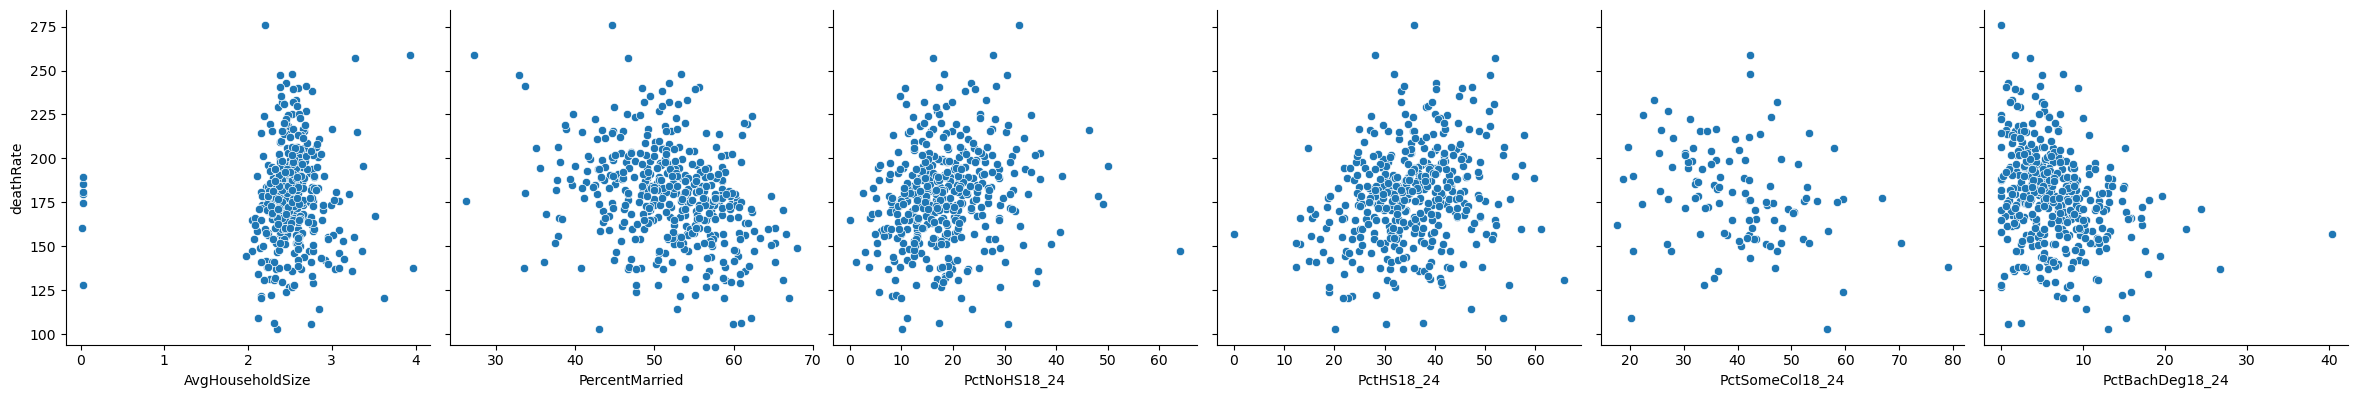

In [13]:
# Sub-Grupo 3
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub3_feature, kind="scatter")

En este sub grupo (4) de features parece que todas las variables si tiene relacion con la variable objetivo. Esta variables son `PctHS25_Over`, `PctBachDeg25_Over`, `PctEmployed16_Over`, `PctUnemployed16_Over`, `PctPrivateCoverage`y `PctPrivateCoverageAlone`.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


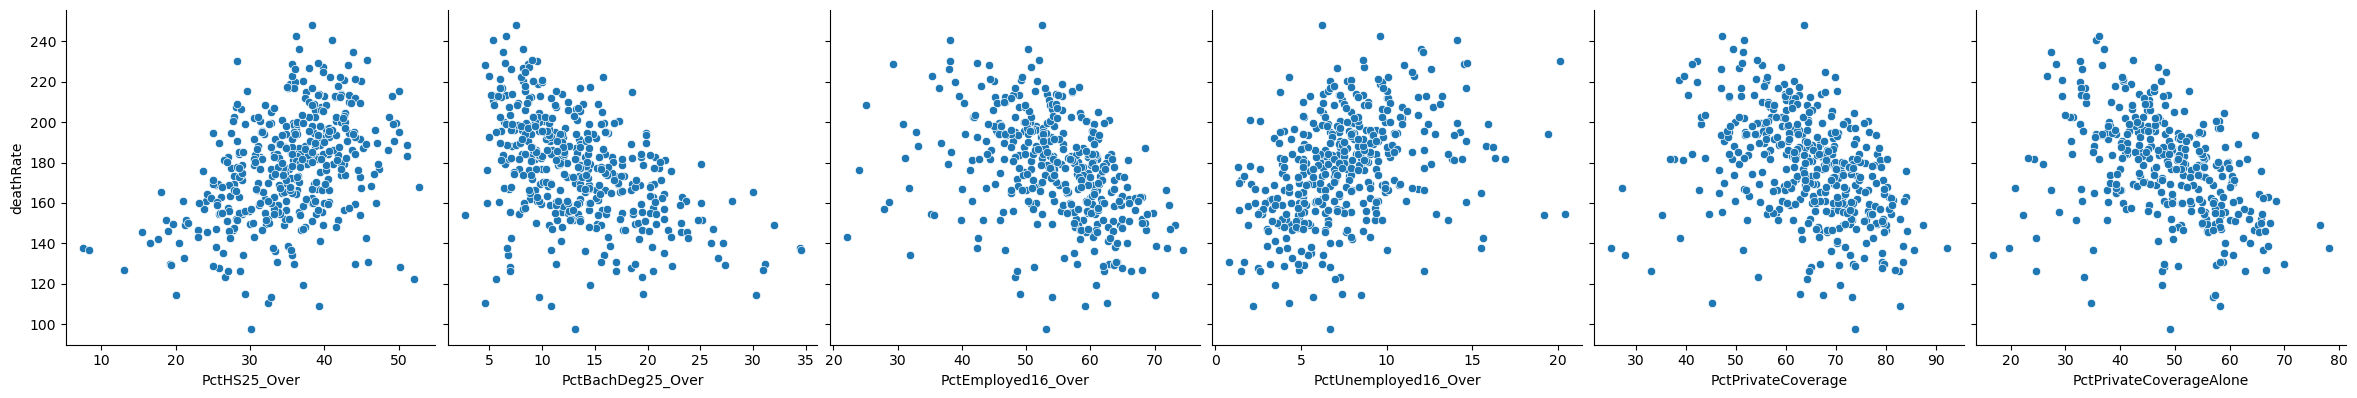

In [14]:
# Sub-Grupo 4
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub4_feature, kind="scatter")

En este sub grupo (5) de features solo dos de las variables si tienen relacion con la variable objetivo. Esta variables son `PctPublicCoverage`y `PctPublicCoverageAlone`.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


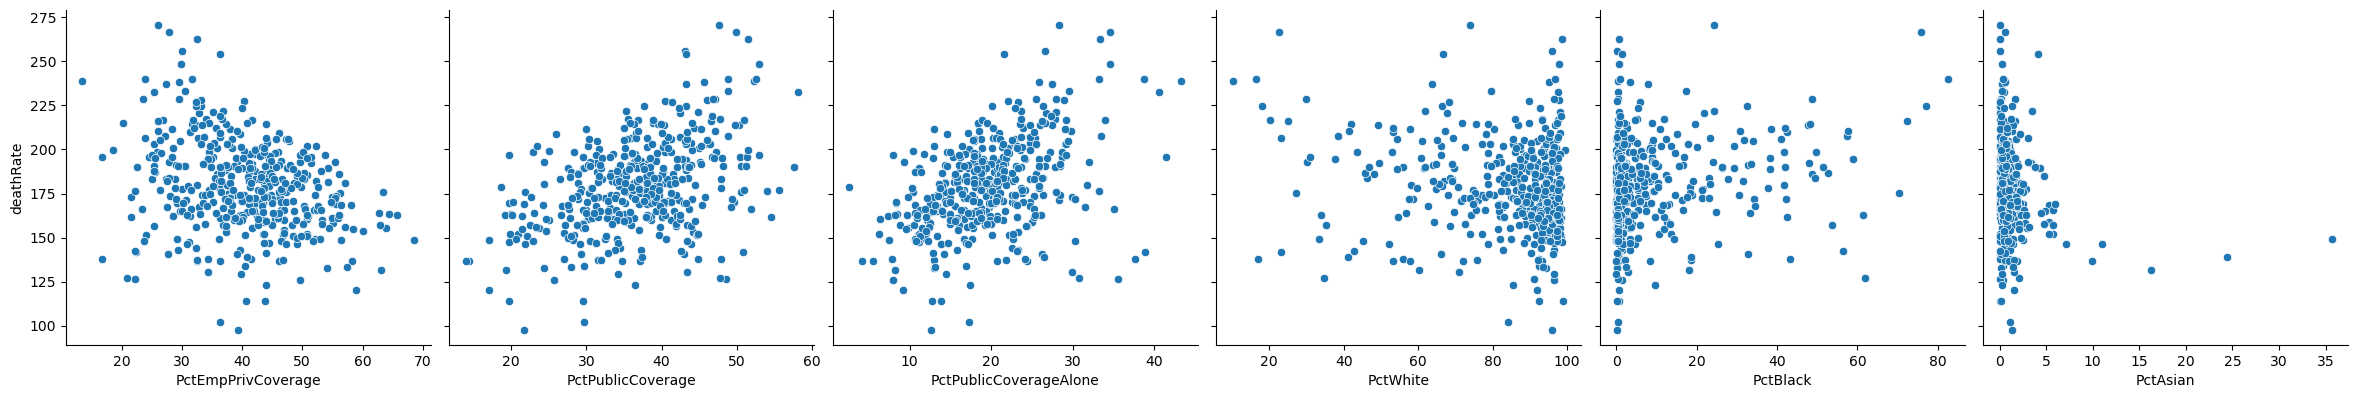

In [15]:
# Sub-Grupo 5
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub5_feature, kind="scatter")

En este sub grupo (6) de features parece que no hay variables que se relacionen con la variable objetivo.

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


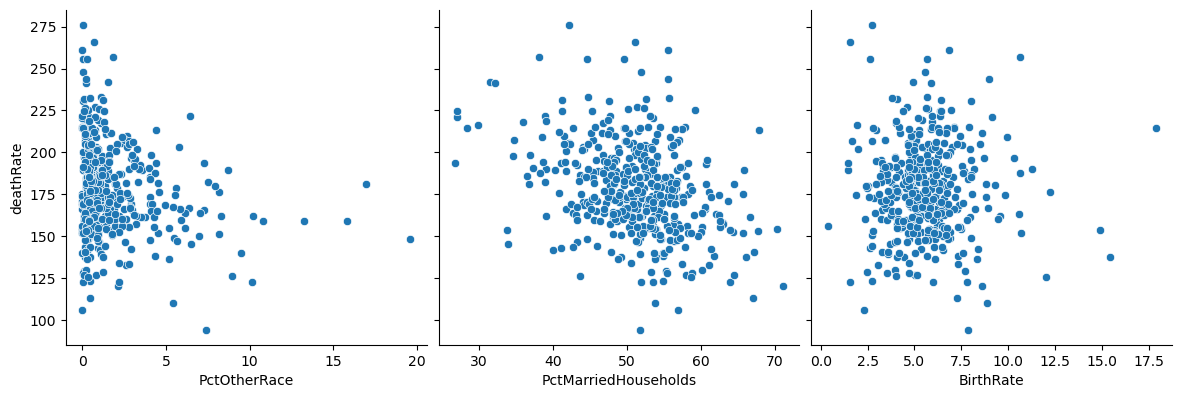

In [16]:
# Sub-Grupo 6
sns.pairplot(cancer_df.sample(frac=0.2), height=4, y_vars="deathRate", x_vars=sub6_feature, kind="scatter")

#### Analisis

Se puede ver que las variables mas relacionadas con la variable objetivo `deathRate` son: `incidenceRate`, `medIncome`, `povertyPercent`, `PctHS25_Over`, `PctBachDeg25_Over`, `PctEmployed16_Over`, `PctUnemployed16_Over`, `PctPrivateCoverage`, `PctPrivateCoverageAlone`, `PctPublicCoverage`y `PctPublicCoverageAlone`. Teniendo eso en cuenta, se utilizaran estas variables para el siguiente analisis de correlacion entre las variables. De momento se puede sacar la hipotesis que existe una correlacion entre el nivel y estabilidad economica para pagar un tratamiento de un condado y su tasa de muertes por cancer.


### 1.2.2. Búsqueda de relaciones con la variable objetivo

Se va realizar el analisis con heatmap para ver las relaciones entre las variables.

<Axes: >

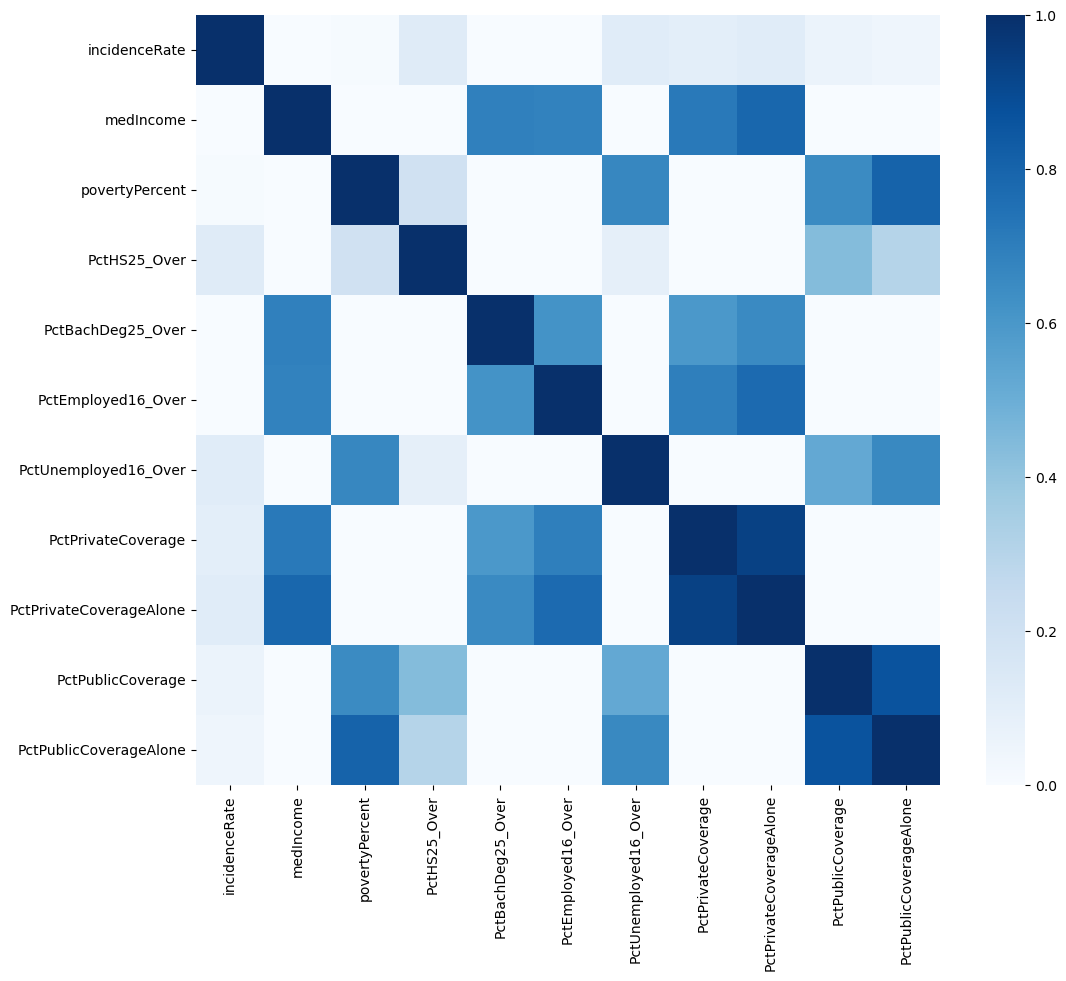

In [17]:
### Se van a utilizar las variables que se escogieron en el punto anterior.

ch_features = ["incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverage", "PctPrivateCoverageAlone", "PctPublicCoverage", "PctPublicCoverageAlone"]

plt.figure(figsize=(12, 10))
sns.heatmap(cancer_df[ch_features].corr(), cmap="Blues", vmin=0, vmax=1)

Un buen punto de corte (empírico) para decidir si descartar una variable debido a su alta correlación con otra es ~ $|0.8|$. En este caso se puede ver que las variables con una alta correlacion entre si, son `PctPrivateCovarage`, `PctPrivateCovarageAlone`, `PctPublicCovarage`y `PctPublicCovarageAlone`. Teniendo en cuenta el objetivo de la  OMS de permitirle a los gobiernos nacionales y locales iniciar estrategias contra el cancer por medio del modelo, las variables que deberian eliminarse son `PctPrivateCovarage` y `PctPublicCovarage` dado a que estos describen el porcentaje de residentes del condado con cobertura de salud privada o publica por el empleador. El razonamiento se debe a que el gobierno deberia tener interes sobre los porcentajes donde estan colaborando con la salud de sus ciudadano y donde no para poder crear las estrategias que estan buscando. Quedando el heatmap actualizado de la siguiente manera.

<Axes: >

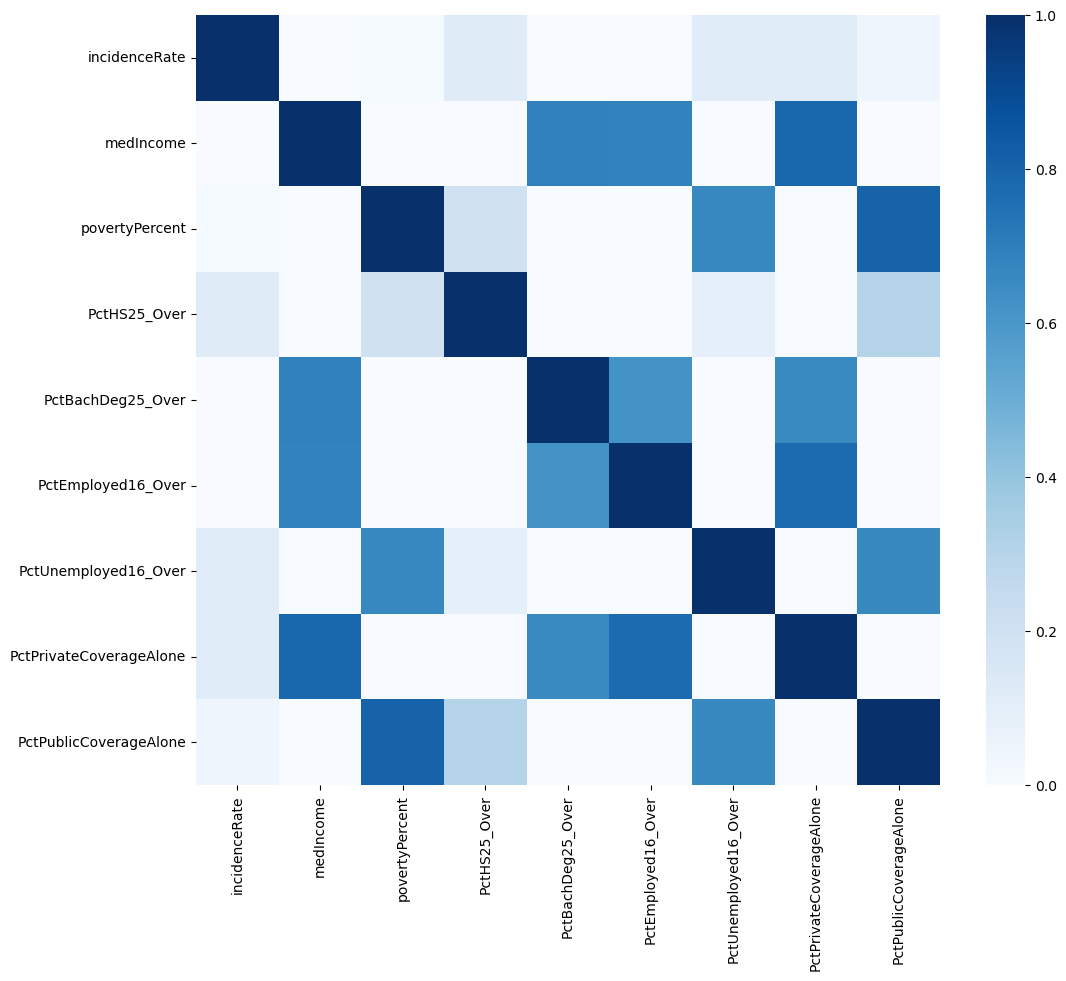

In [18]:
### Se van a utilizar las variables que se escogieron en el punto anterior.

final_features = ["incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverageAlone", "PctPublicCoverageAlone"]

plt.figure(figsize=(12, 10))
sns.heatmap(cancer_df[final_features].corr(), cmap="Blues", vmin=0, vmax=1)

###  1.3. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez. En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.3.1. Completitud - Análisis de valores nulos o vacíos

Como se evidencio anteriormente se puede ver que las columnas afectadas por nulos son:`PctPrivateCoverageAlone` y `PctEmployed16_Over`; teniendo porcentajes de ~20% y ~5% respectivamente. Aqui lo que podemos ver es que una  buena cantidad de los datos de `PctPrivateCoverageAlone`contienen nulos por ende eliminarlos pueda estar en debate por que estariamos perdiendo una cantidad significante de registros.

In [31]:
# Cálculo de porcentaje de valores nulos por columna
((cancer_df[["deathRate"]+final_features].isnull().sum()/cancer_df.shape[0])).sort_values(ascending=False)

PctPrivateCoverageAlone    0.20075
PctEmployed16_Over         0.05394
deathRate                  0.00000
incidenceRate              0.00000
medIncome                  0.00000
povertyPercent             0.00000
PctHS25_Over               0.00000
PctBachDeg25_Over          0.00000
PctUnemployed16_Over       0.00000
PctPublicCoverageAlone     0.00000
dtype: float64

### 1.3.2.  Unicidad

Afortunadamente, no hay filas  repetidas con las variables seleccionadas dentro del Dataframe.

In [20]:
print('Total de filas repetidas:', cancer_df[final_features].duplicated(keep = False).sum())

Total de filas repetidas: 0


### 1.3.3. Consistencia

Revisaremos las variables de tipo porcentaje. Utilizando la funcion `describe()` podemos ver que tiene un rango entre [0 - 100]% y que todas los datos no parecen salirse de ese rango.

In [26]:
cancer_df[name_cols_pct].describe()

,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverageAlone,PctPublicCoverageAlone
count,2132.000000,2132.000000,2132.000000,2017.000000,2132.000000,1704.000000,2132.000000
mean,16.889681,34.949578,13.225797,54.119137,7.843574,48.407688,19.282786
std,6.415614,7.056699,5.395211,8.398898,3.448596,9.985504,6.136426
min,3.200000,7.500000,2.500000,17.600000,0.700000,15.700000,2.600000
25%,12.200000,30.600000,9.300000,48.600000,5.500000,41.275000,14.900000
50%,15.900000,35.400000,12.300000,54.400000,7.600000,48.800000,18.900000
75%,20.300000,39.800000,16.100000,60.300000,9.700000,55.500000,23.200000
max,47.400000,54.800000,42.200000,80.100000,29.400000,78.200000,46.600000


### 1.3.4.  Validez

Ahora utilizando un boxplot, lo que podemos notar es que hay una evidencia grande de outliers que pueden sesgar el resultado de la regresion. Lo mejor puede ser una transformación de datos, que podría ayudar a corregir esto y hacer que la distribución sea más simétrica.

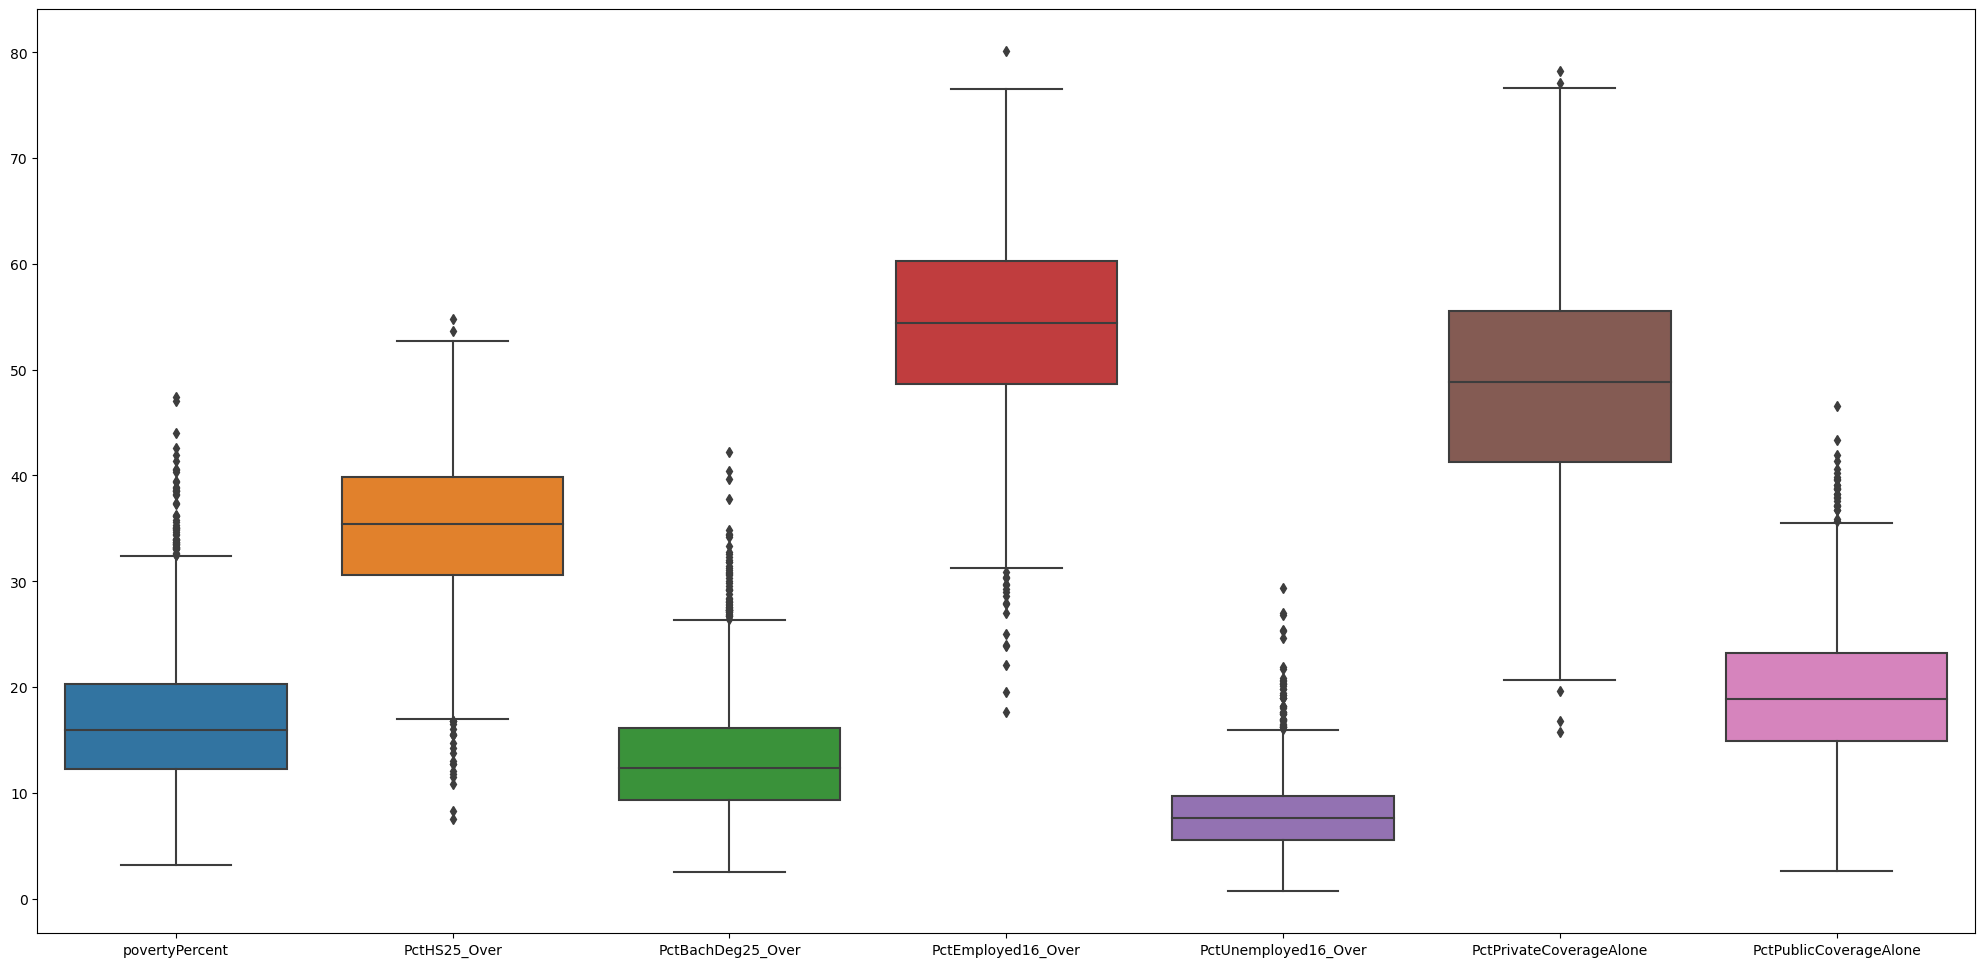

In [22]:
#Visualización de todas las variables numéricas que representen porcentaje de tipo Float
name_cols_pct = ['povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverageAlone', 'PctPublicCoverageAlone']
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df[name_cols_pct], orient="v")

Ahora se van a revisar los promedio de **numero de diagnosticos**, **numero de muertes** e **ingreso medio por condado**. En estos se pudo identificar que hay una cantidad significamente de outliers, lo que se puede hacer es clasificarlos en niveles de alto, promedio y bajo dependiendo de la media de cada uno para poder tener una clasificacion.

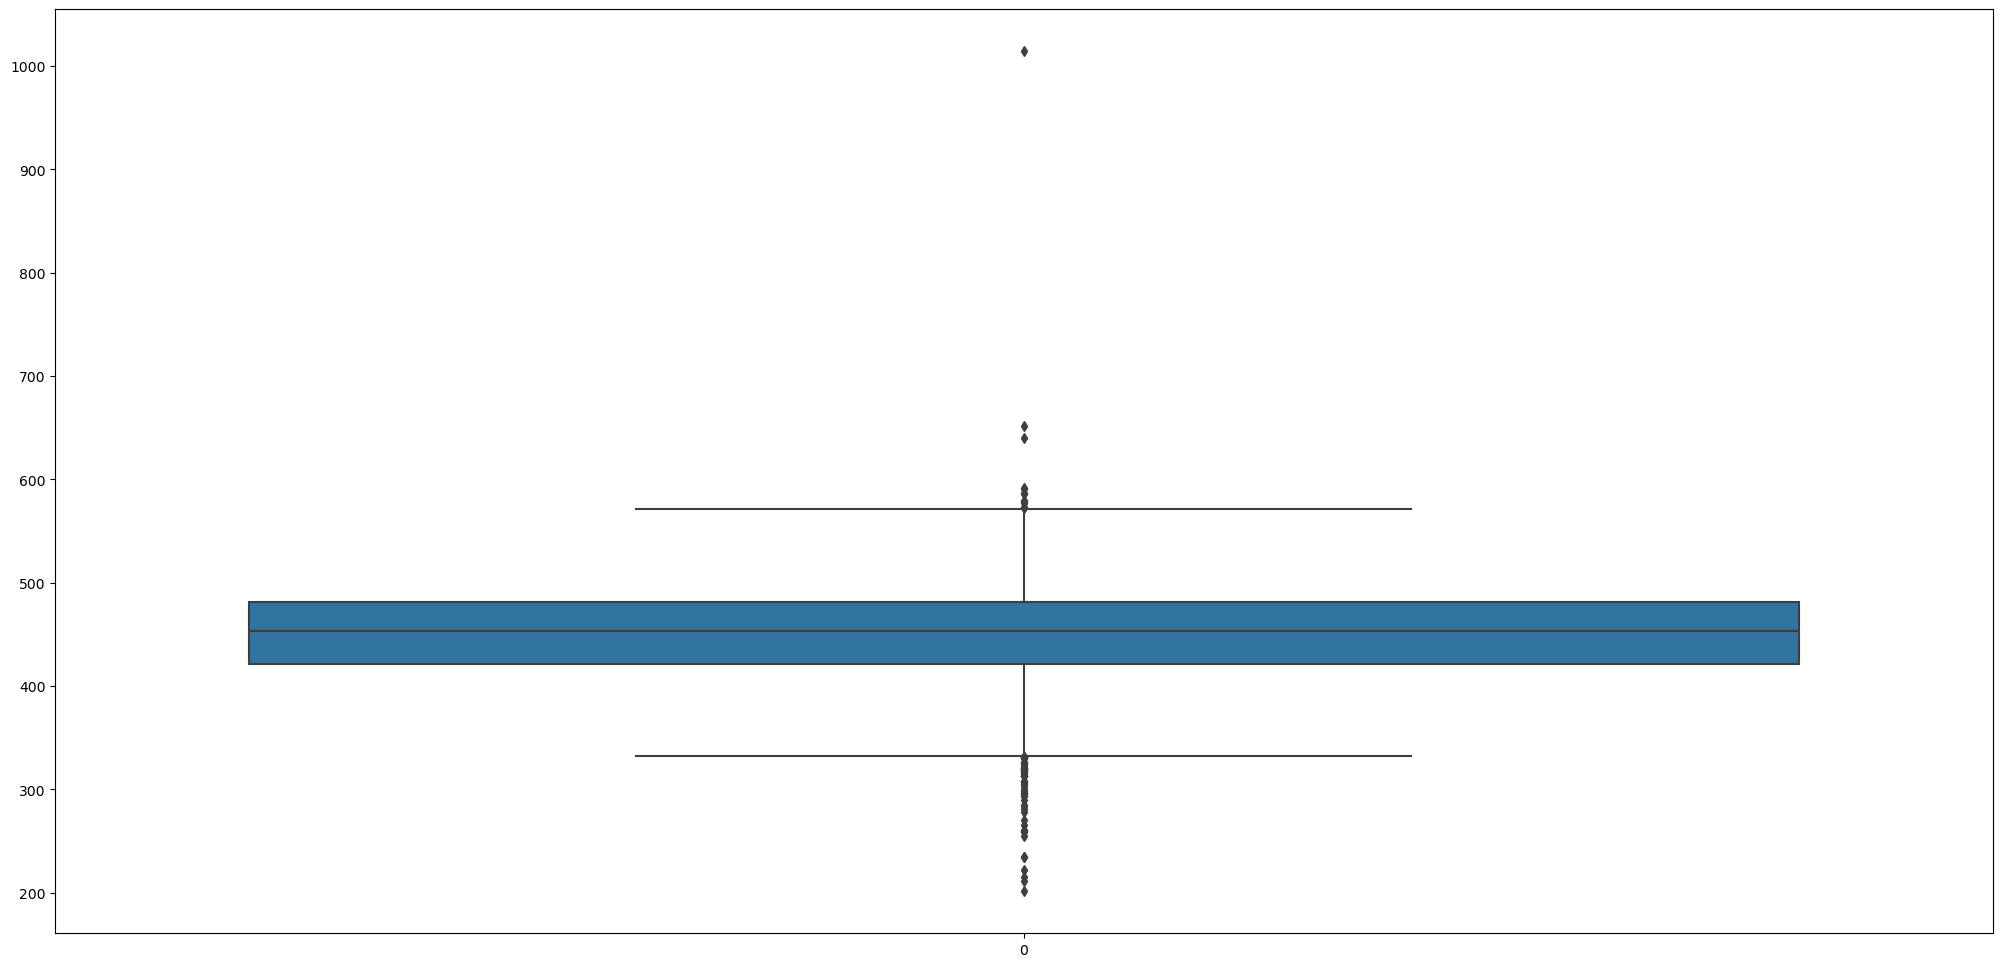

In [33]:
#Visualización de todas las variables numéricas que representen promedio de tipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df["incidenceRate"], orient="v")

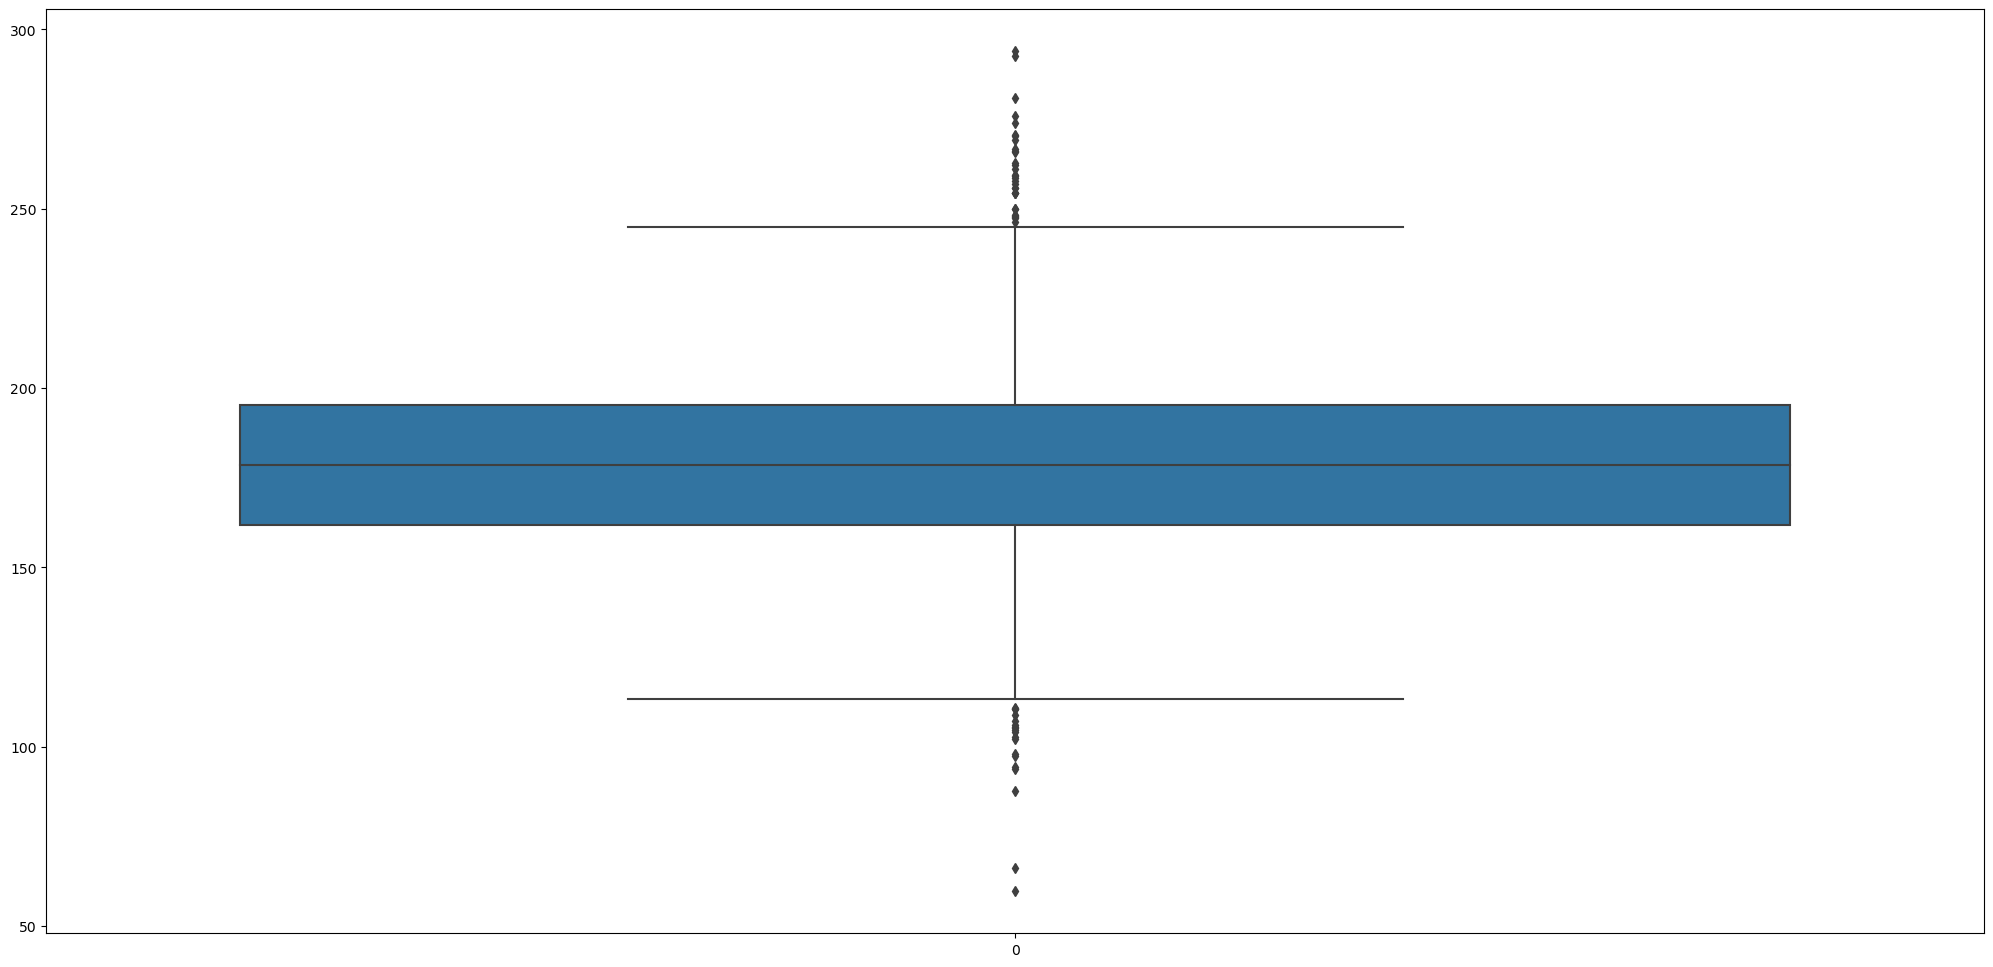

In [34]:
#Visualización de todas las variables numéricas que representen promedio de tipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df["deathRate"], orient="v")

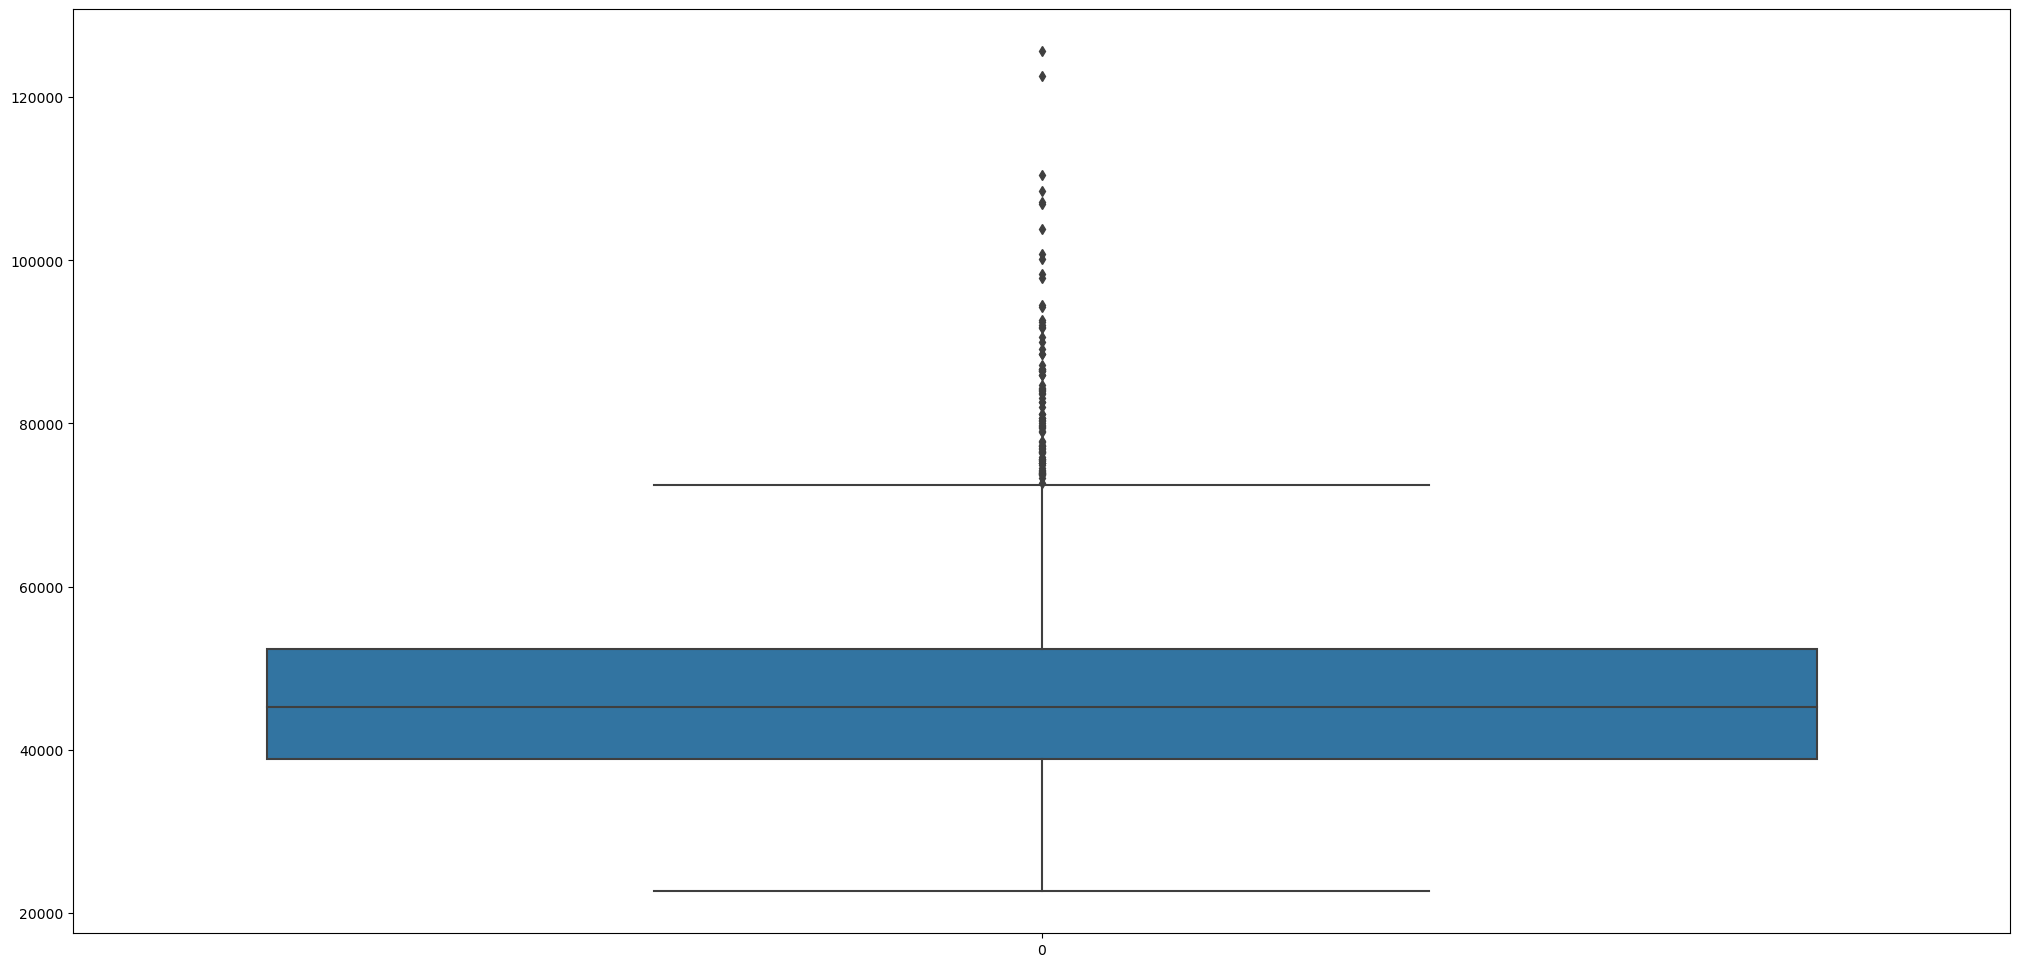

In [35]:
#Visualización de todas las variables numéricas que representen promedio de tipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=cancer_df["medIncome"], orient="v")

## 2. Preparacion de datos.

### 2.1. Eliminar nulos

En el caso de los datos de la columna `PctEmployed16_Over`, se puede eliminar los registros que contengan nulos debido a que solo representan un ~5% aproximado de los datos. No habra un cambio significativo a la hora de hacer la regresion.

In [37]:
cancer_df.dropna(subset=['PctEmployed16_Over'], inplace=True)

Ahora en el caso de la columna `PctPrivateCoverageAlone` es un poco mas complicado, dado a que los registros con datos nulos representan un 20% de la totalidad de los datos. Entonces lo que se va hacer es darles la media de actual que seria ~48.41, para no tener que perder informacion relevante para el modelado.

In [38]:
cancer_df['PctPrivateCoverageAlone'].fillna(48.41, inplace=True)

Se comprueba de que no haya nulos.

In [39]:
((cancer_df[["deathRate"]+final_features].isnull().sum()/cancer_df.shape[0])).sort_values(ascending=False)

deathRate                  0.0
incidenceRate              0.0
medIncome                  0.0
povertyPercent             0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverageAlone    0.0
PctPublicCoverageAlone     0.0
dtype: float64

### 2.2. Transformacion de Datos

Como se menciono antes se realizara una transformacion de datos por medio de la aplicacion de la raiz cuadrada para ayudar a distribuir los datos y hacer que la esta sea más simétrica.

In [44]:
cancer_df[name_cols_pct] = np.sqrt(cancer_df[name_cols_pct])